# Step 1: Business Understanding

# Who is the user?
### after that go to problem, make it specific. Then, the model implimentation.

### 1.1. Context

The dataset originates from the 1990 California census, providing valuable information for predicting housing prices in different districts. Although it reflects past data, this dataset serves as an accessible introduction to machine learning, offering a practical basis for teaching key concepts in regression analysis.

--

### 1.2. Problem Statement

- Who is the user facing the problem?
    - The primary users are DATA ANALYSTS, REAL ESTATE COMPANIES, and POLICYMAKERS who need to understand factors influencing housing prices.
        - DATA ANALYSTS: Responsible for interpreting vast amounts of data to uncover patterns, trends, and insights. By utilizing predictive model, they can provide critical information that supports strategic decision-making within different organizations.
        - REAL ESTATE COMPANIES: Leverage the predictive model to inform their pricing strategies, investment decisions, and market entry strategies. Predictive models enable them to stay ahead of market trends, make informed investment decisions, and adjust their portfolio strategies accordingly.
        - POLICYMAKERS: Use the model to understand housing affordability, plan for urban development, and craft policies that address housing market imbalances. By using this model, they can base their decisions on solid empirical evidence, ensuring that their policies are effective and targeted.

- What problem are these users facing?
    - The challenge is accurately predicting median house values based on various socio-economic and geographic factors. Reliable predictions can guide investment decisions, urban planning, and policy-making.
- Why does this problem need to be solved?
    - Predicting housing prices is crucial for strategic planning and decision-making in real estate markets. Accurate models can help identify trends, assess property values, and anticipate market shifts.

--

### 1.3. Goals

The project’s goal is to develop a regression model that can predict the median house value in California districts based on available census data. The model should be specific, measurable, and achievable, with the aim to improve prediction accuracy by minimizing error rates.
- Specific: Predicting the median house value in California districts based on specific factors like geographic location, socio-economic indicators, and housing characteristics.
- Measurable: The model's success can be evaluated using clear, objective metrics.
- Achievable: The goal should be realistic and attainable given the available data, resources, and time constraints.

--

### 1.4. Analytic Approach

1. What solution design is proposed to address the problem?
- The proposed solution involves designing a predictive model using supervised machine learning techniques, specifically regression analysis.
    - A. Type of question: Predictive (forecasting housing prices).
    - B. Type of ML algorithm: Supervised (e.g., Linear Regression, Random Forest Regressor).

2. When and how will users utilize this solution?
- The solution will be used by analysts and decision-makers during the planning stages to predict housing trends. This will help them make better choices about where to allocate resources, set prices, and evaluate the market.

--

### 1.5. Success Criteria

1. What are the conditions of miss-prediction and their consequences?
- Regression errors:
    - A. Overprediction: Predicting higher median house values than actual, leading to overvaluation in investment or policy errors.
    - B. Underprediction: Predicting lower median house values than actual, resulting in undervaluation and potential missed opportunities.

2. What assumptions or research results will be used?
- The assumptions include that the 1990 census data is still useful for predicting housing prices and that the features chosen represent important factors. Initial research will guide which features to use and how to clean the data.

- based / or real time (0)
- overprice or underprice, property agent

--

### 1.6. Project Limitations

- The dataset is based on the 1990 California census, so it might not fully apply to today’s housing market. 
- Since the data hasn’t been cleaned, it will need some processing, which could lead to mistakes or bias in the model.

---

# Step 2: Data Understanding

### 2.1. Where the data come from, when, and who made?
- This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

--

### 2.1. Explain the data and each representing what

| **No** | **Column Name** | **Column Description**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| 1    | longitude         | A measure of how far west a house is; a higher value is farther west                     |
| 2    | latitude        | A measure of how far north a house is; a higher value is farther north                           |
| 3    | housing_median_age      | Median age of a house within a block; a lower number is a newer building                           |
| 4    | total_rooms        | Total number of rooms within a block      |
| 5    | total_bedrooms    | Total number of bedrooms within a block                  |
| 6    | population         | Total number of people residing within a block                       |
| 7    | households            | Total number of households, a group of people residing within a home unit, for a block                          |
| 8    | median_income          | Median income for households within a block of houses (measured in tens of thousands of US Dollars)                        |
| 9    | ocean_proximity        | Location of the house w.r.t ocean/sea                     |
| 10   | median_house_value        | Median house value for households within a block (measured in US Dollars)                |

--

3. data attributes relevancy to business understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

In [2]:
data = pd.read_csv("data_california_house.csv")
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10801,-116.95,32.84,31.0,1307.0,NaN,752.0,231.0,3.4286,<1H OCEAN,129400.0
4813,-117.91,34.10,35.0,2746.0,478.0,1779.0,501.0,4.2500,<1H OCEAN,166700.0
6684,-119.67,36.89,15.0,2373.0,364.0,1280.0,386.0,5.3080,INLAND,167500.0
12476,-117.66,33.60,24.0,1684.0,232.0,781.0,230.0,6.8667,<1H OCEAN,279600.0
11507,-118.28,34.26,32.0,1079.0,207.0,486.0,167.0,4.9833,<1H OCEAN,213000.0
3949,-118.75,34.18,4.0,16704.0,2704.0,6187.0,2207.0,6.6122,NEAR OCEAN,357600.0
10317,-121.30,38.05,52.0,122.0,26.0,62.0,25.0,1.1500,INLAND,112500.0
6823,-117.23,33.22,16.0,3224.0,729.0,1036.0,608.0,2.0246,<1H OCEAN,148800.0
2112,-118.10,34.08,21.0,1349.0,352.0,1188.0,330.0,2.5000,<1H OCEAN,182100.0
1561,-118.37,33.97,41.0,1833.0,355.0,847.0,348.0,5.7260,<1H OCEAN,287800.0


In [22]:
# Display column names to ensure they are appropriate
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [8]:
# Check unique count and values of each column
def unique_data(data):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = data.columns
    data_unique['Unique Count'] = [data[col].nunique() for col in data.columns]
    data_unique['Unique'] = [data[col].unique() for col in data.columns]
    return data_unique

unique_data(data)

,Columns,Unique Count,Unique
0,longitude,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, -117.79, -117.8, -121.26, -117.65, -122.27, -121.94, -121.9, -118.15, -117.5, -121.33, -115.99, -117.09, -118.14, -120.9, -121.51, -117.32, -117.34, -121.53, -118.27, -120.84, -120.38, -118.2, -121.52, -121.09, -117.54, -119.29, -119.83, -118.12, -118.31, -118.24, -117.62, -121.95, -117.88, -117.68, -121.92, -118.85, -122.41, -117.59, -121.86, -118.02, -122.43, -122.26, -117.02, -118.26, -121.36, -119.9, -121.85, -120.85, -118.21, -121.65, -119.74, -122.03, -117.69, -122.04, -122.25, -118.43, -121.91, -124.0, -117.82, -123.98, -121.99, -120.6, -118.22, -122.05, -121.64, -117.75, -117.25, -118.29, -122.7, -121.49, -122.28, -122.02, -121.47, -117.72, -117.31, -121.38, -117.17, -119.12, -121.2, -117.22, -122.47, -118.36, -124.16, -122.42, -117.92, -124.13, -122.24, -121.8, -117.93, -120.46, -116.86, -117.28, -120.99, -117.89, -118.39, ...]"
1,latitude,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.69, 33.48, 37.97, 37.28, 37.44, 34.05, 33.96, 38.64, 33.4, 32.68, 34.7, 38.2, 38.5, 34.14, 34.13, 38.61, 34.08, 38.77, 36.76, 33.93, 38.57, 38.68, 33.82, 37.98, 36.53, 36.8, 34.09, 33.67, 34.11, 38.31, 33.77, 35.63, 37.3, 34.21, 37.37, 37.6, 33.91, 37.32, 33.65, 37.71, 33.97, 37.88, 32.7, 33.94, 34.19, 38.67, 36.94, 38.0, 37.06, 36.71, 39.13, 34.44, 37.39, 37.36, 37.84, 34.22, 34.02, 33.71, 37.29, 40.22, 33.68, 40.88, 37.26, 33.95, 37.93, 36.68, 33.21, 34.17, 38.36, 38.58, 36.97, 37.9, 37.53, 33.51, 34.35, 32.77, 35.39, 33.84, 39.25, 34.26, 37.51, 35.6, 34.07, 40.79, 38.27, 33.63, 40.8, 37.59, 37.75, 34.03, 33.72, 38.09, 33.64, 33.05, ...]"
2,housing_median_age,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0, 18.0, 4.0, 31.0, 12.0, 27.0, 15.0, 20.0, 16.0, 25.0, 32.0, 29.0, 5.0, 38.0, 41.0, 9.0, 33.0, 24.0, 42.0, 44.0, 21.0, 35.0, 34.0, 7.0, 13.0, 22.0, 49.0, 26.0, 40.0, 3.0, 30.0, 39.0, 23.0, 46.0, 51.0, 47.0, 48.0, 28.0, 19.0, 37.0, 36.0, 2.0, 8.0, 45.0, 1.0]"
3,total_rooms,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0, 1206.0, 3917.0, 1638.0, 15259.0, 4356.0, 1646.0, 3362.0, 7923.0, 2203.0, 1945.0, 2569.0, 1984.0, 3120.0, 4719.0, 1691.0, 331.0, 8149.0, 2265.0, 1013.0, 932.0, 857.0, 2360.0, 5218.0, 202.0, 2370.0, 1509.0, 3756.0, 3603.0, 1297.0, 2141.0, 3030.0, 1911.0, 777.0, 1519.0, 4334.0, 1335.0, 2195.0, 1476.0, 4424.0, 10223.0, 2519.0, 2548.0, 1508.0, 1903.0, 2363.0, 2756.0, 1510.0, 1678.0, 5819.0, 2513.0, 3364.0, 2609.0, 1026.0, 2574.0, 4833.0, 4257.0, 3280.0, 3240.0, 3298.0, 3549.0, 1588.0, 561.0, 4014.0, 3597.0, 2088.0, 7105.0, 1719.0, 4034.0, 2521.0, 1823.0, 7803.0, 6568.0, 1293.0, 1944.0, 1732.0, 5817.0, 2151.0, 2695.0, 2261.0, 564.0, 4280.0, 1072.0, 3617.0, 2404.0, 2943.0, 3856.0, 1264.0, 3301.0, 906.0, 2398.0, 8020.0, 4974.0, 3643.0, 2382.0, ...]"
4,total_bedrooms,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 142.0, 638.0, 188.0, 2275.0, 1334.0, 408.0, 799.0, 1470.0, 493.0, 536.0, 737.0, 614.0, 641.0, 745.0, 353.0, 85.0, 1913.0, 801.0, 244.0, 201.0, 471.0, 711.0, 29.0, 424.0, 352.0, 681.0, 1003.0, 246.0, 451.0, 589.0, 439.0, 148.0, 388.0, 296.0, 414.0, 217.0, 834.0, 1491.0, 581.0, 646.0, 278.0, 469.0, 604.0, 516.0, 410.0, 277.0, 1507.0, 570.0, 645.0, 221.0, 807.0, 944.0, 1031.0, 933.0, 481.0, 460.0, 707.0, 360.0, 284.0, 868.0, 664.0, 535.0, 1459.0, 372.0, 611.0, 484.0, 358.0, 477.0, 1603.0, 339.0, 488.0, 305.0, 878.0, 96.0, 673.0, nan, 597.0, 390.0, 554.0, 875.0, 202.0, 712.0, 144.0, 448.0, 1432.0, 764.0, 706.0, 404.0, 241.0, 279.0, 732.0, 566.0, 226.0, 462.0, ...]"
5,population,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, 572.0, 1809.0, 7266.0, 1968.0, 853.0, 1939.0, 4861.0, 1158.0, 515.0, 2341.0, 1071.0, 1319.0, 1857.0, 1457.0, 341.0, 2933.0, 2899.0, 410.0, 1043.0, 934.0, 1041.0, 1949.0, 75.0, 1129.0, 1734.0, 1586.0, 2719.0, 611.0, 1777.0, 1373.0, 930.0, 362.0, 1203.0, 635.0, 1360.0, 613.0, 1915.0, 5205.0, 2094.0, 755.0, 1138.0, 1882.0, 1558.0, 1849.0, 1408.0, 737.0, 3237.0, 1806.0, 1796.0, 789.0, 3163.0, 2336

4. descriptive statistics

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data['ocean_proximity'].value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

# Check Anomalies

In [6]:
# Check for null values
null_values = data.isnull().sum()
print(null_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [7]:
data[data['total_bedrooms'].isnull()].sample(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3926,-117.02,32.78,31.0,2567.0,NaN,1198.0,499.0,3.4659,<1H OCEAN,163000.0
5312,-118.07,34.10,32.0,4275.0,NaN,2812.0,1012.0,3.3512,<1H OCEAN,214100.0
7263,-117.14,33.16,16.0,1660.0,NaN,733.0,214.0,5.6874,<1H OCEAN,202700.0
3525,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,<1H OCEAN,118100.0
13830,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,214800.0
11138,-118.36,34.05,45.0,2283.0,NaN,1093.0,475.0,2.5658,<1H OCEAN,252000.0
9756,-122.48,38.50,37.0,3049.0,NaN,1287.0,439.0,4.3125,INLAND,276500.0
11506,-118.27,34.17,52.0,2010.0,NaN,908.0,326.0,6.9135,<1H OCEAN,374000.0
13388,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,INLAND,153000.0
5308,-118.35,34.01,35.0,3776.0,NaN,1583.0,749.0,3.5486,<1H OCEAN,332100.0


In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data[data.duplicated(keep=False)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


In [9]:
# Identify outliers using IQR method for median house value
Q1 = data['median_house_value'].quantile(0.25)
Q3 = data['median_house_value'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['median_house_value'] < (Q1 - 1.5 * IQR)) | (data['median_house_value'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in median house value:", outliers.shape[0])

Number of outliers in median house value: 757


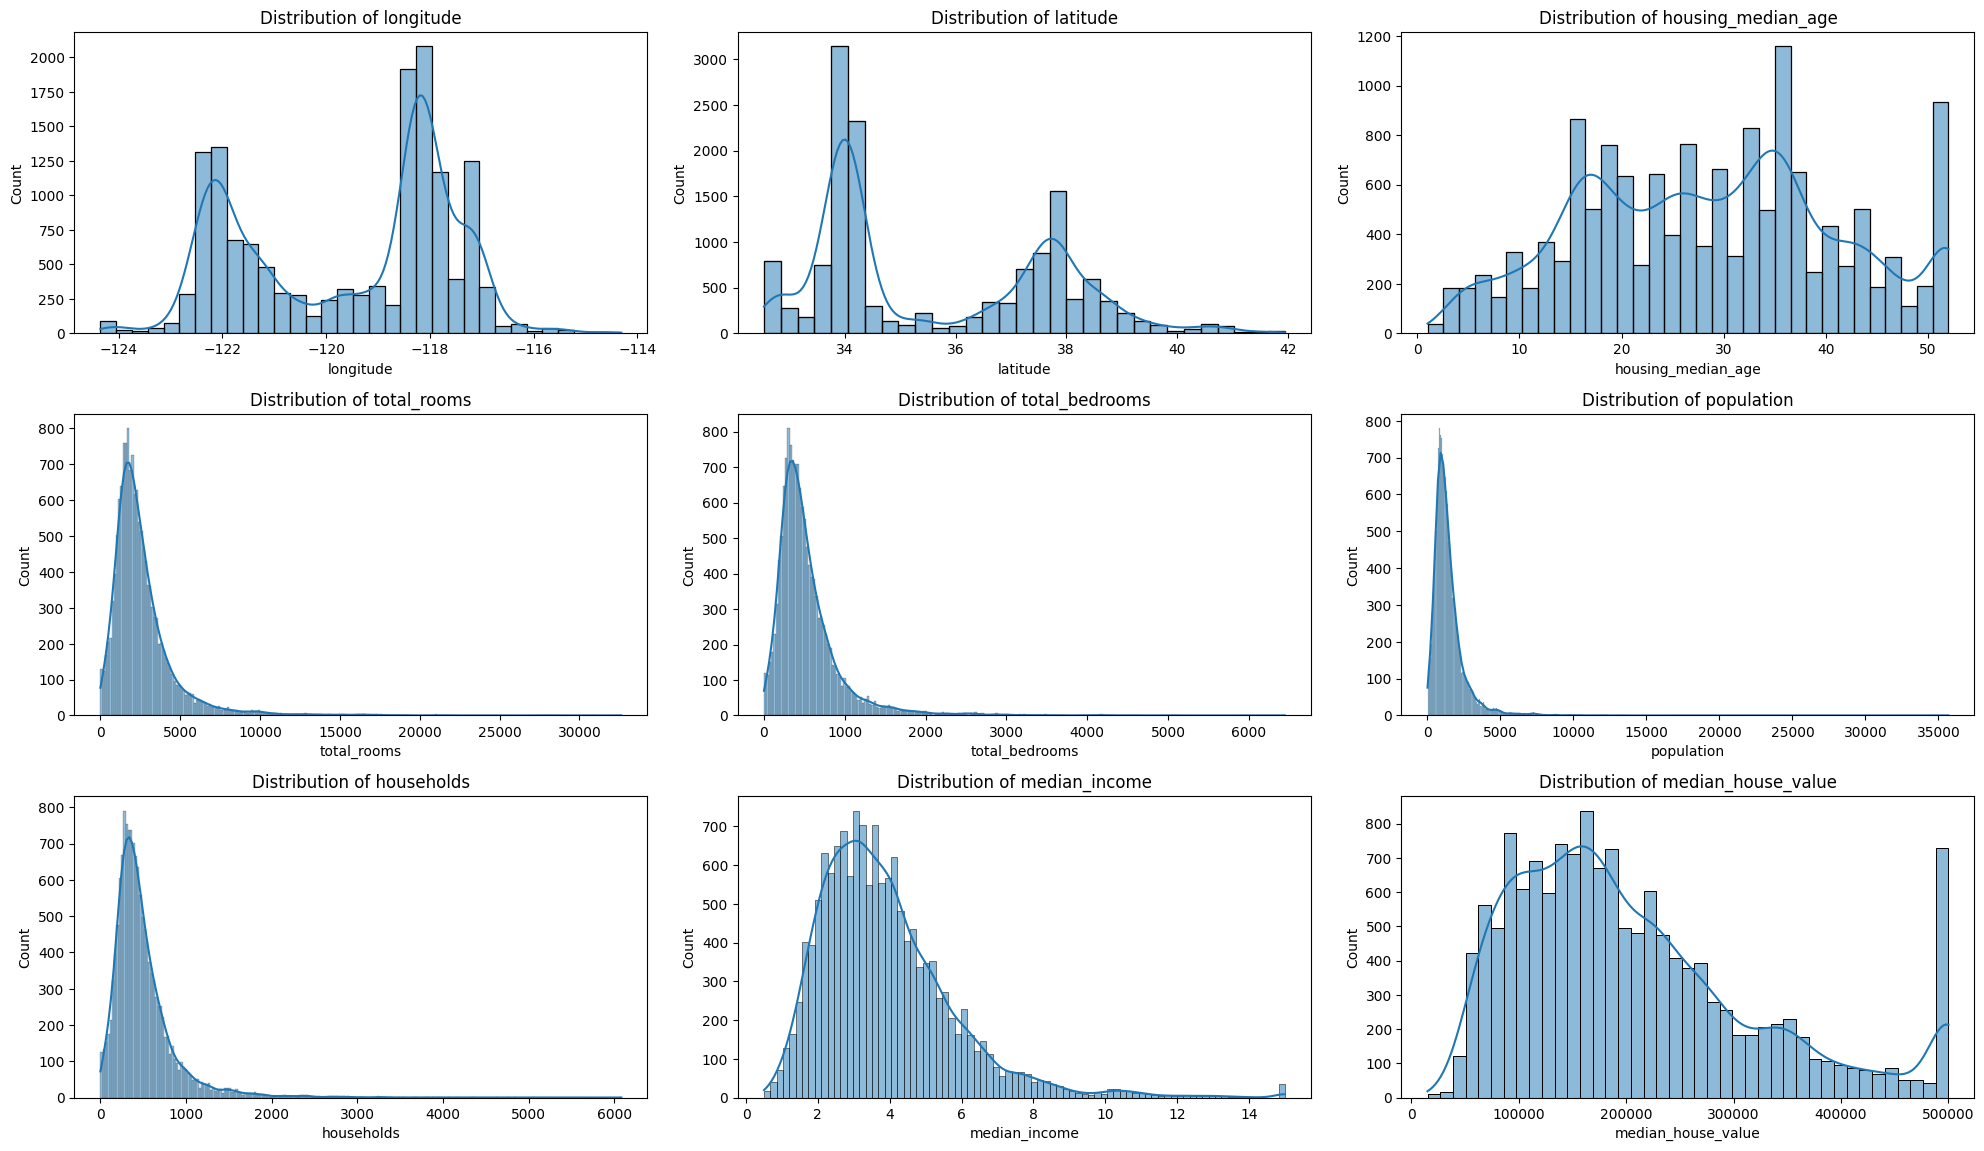

In [5]:
# Data distribution
def plot_data_distribution(data):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(4, 3, i)
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Plotting data distribution
plot_data_distribution(data)

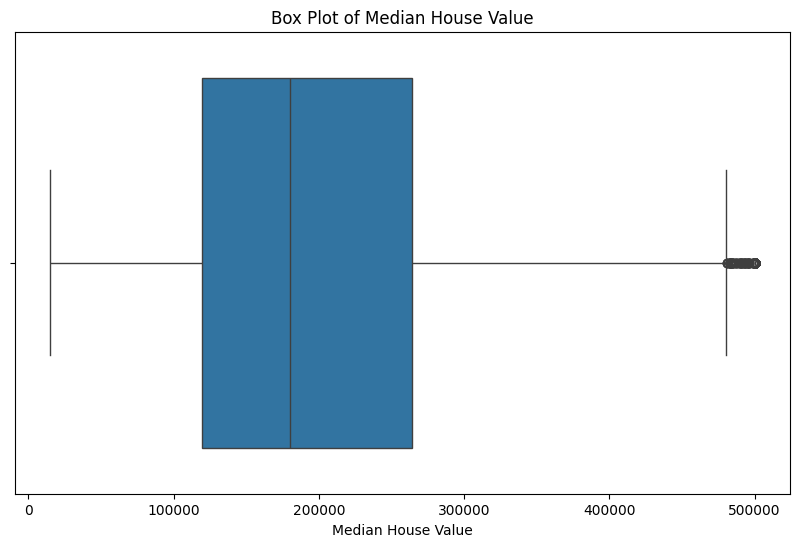

In [10]:
# Box plot for 'median_house_value'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['median_house_value'])
plt.title('Box Plot of Median House Value')
plt.xlabel('Median House Value')
plt.show()

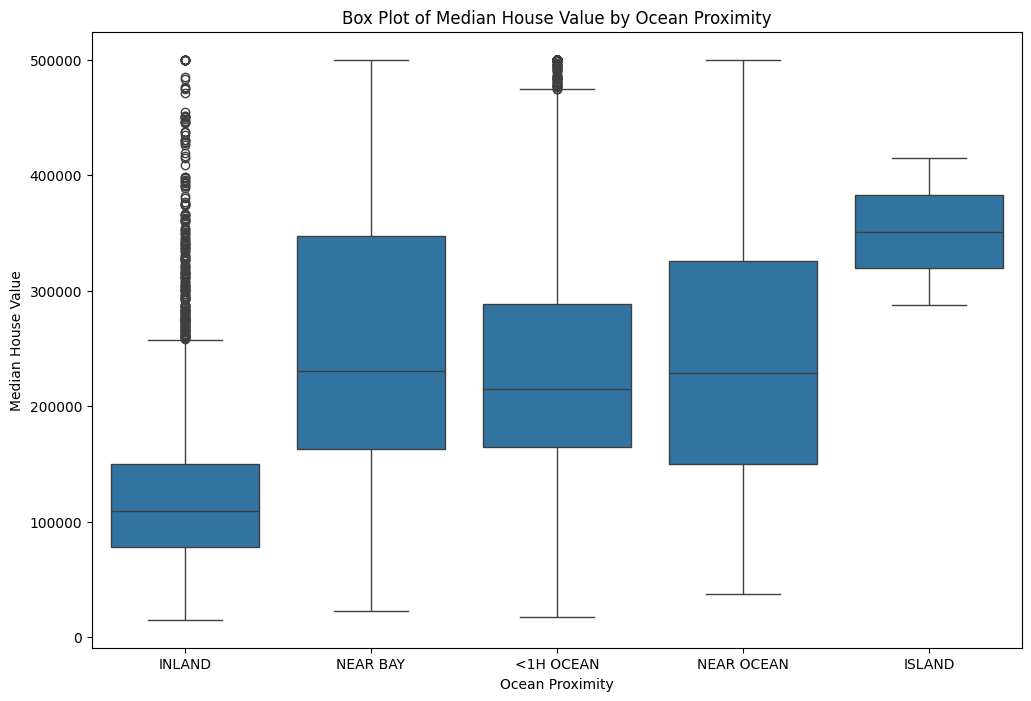

In [12]:
# Box plot for 'median_house_value' by 'ocean_proximity'
plt.figure(figsize=(12, 8))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Box Plot of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

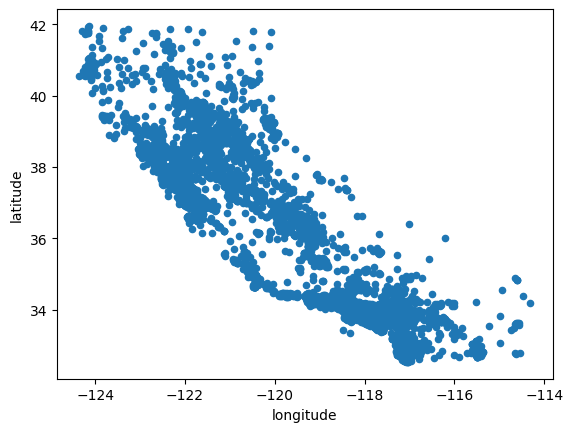

In [7]:
data.plot(kind='scatter', x='longitude', y='latitude')
# save_fig('bad_visualization_plot')

# Step 3: Exploratory Data Analysis (EDA)

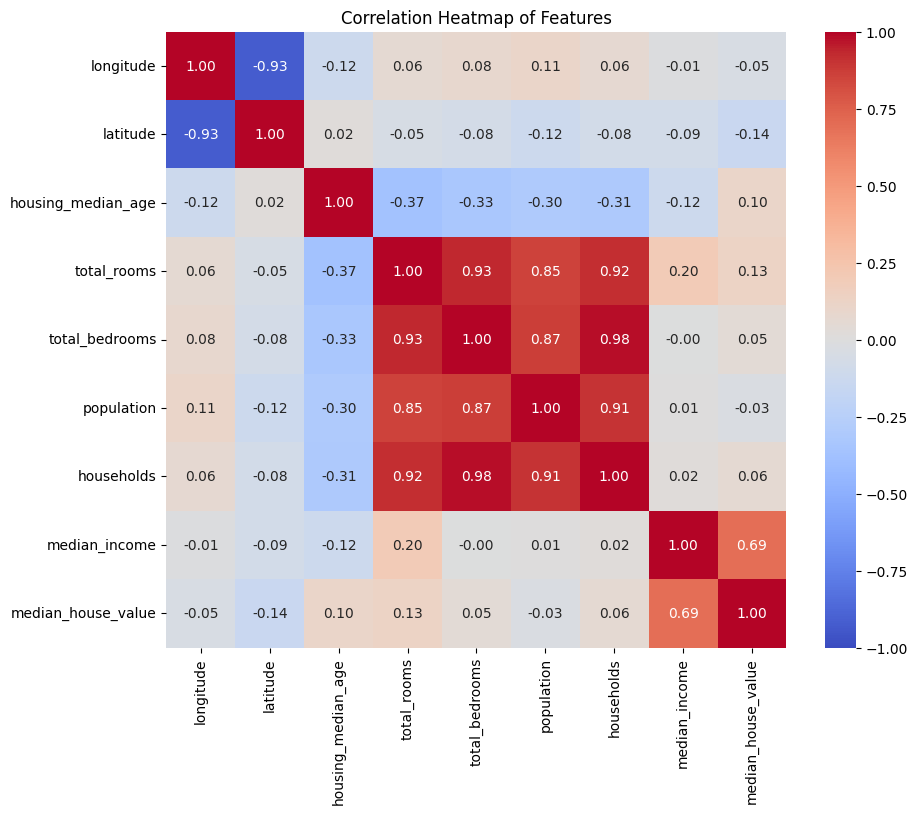

In [15]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()

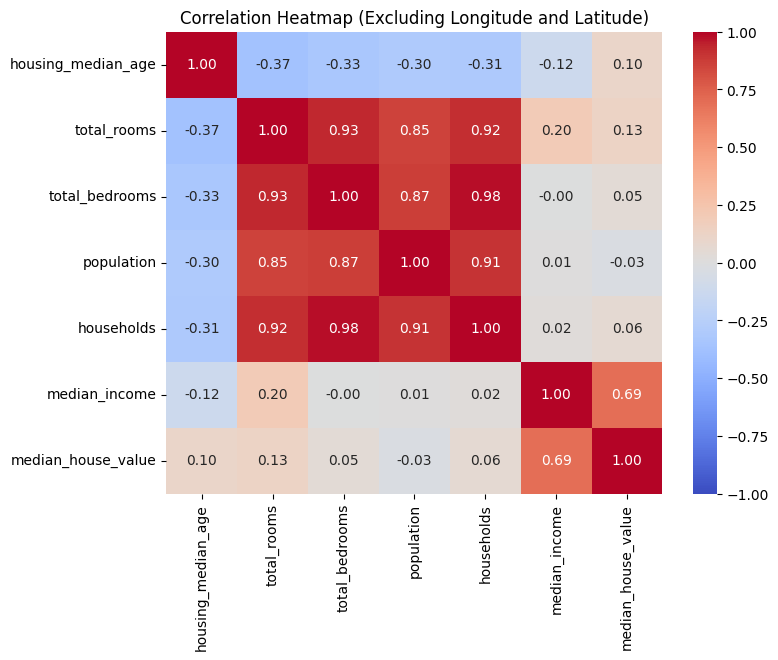

In [16]:
# Exclude 'longitude' and 'latitude' columns
selected_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Calculate correlation matrix for the selected columns
correlation_matrix = data[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Excluding Longitude and Latitude)')
plt.show()